# Demo For the GoWorkshop

## Linear Regression

In [15]:
import (
    "gonum.org/v1/plot"
    "gonum.org/v1/plot/plotter"
    "gonum.org/v1/plot/vg"
    "gonum.org/v1/plot/vg/draw"
    "gonum.org/v1/plot/vg/vgimg"
    "image/color"
    "github.com/janpfeifer/gonb/gonbui"
    "context"
	"fmt"
	"io/ioutil"
	"strings"
	"github.com/rocketlaunchr/dataframe-go"
	"github.com/rocketlaunchr/dataframe-go/imports"
    "math"
    "gonum.org/v1/gonum/stat"
)

### First we need to load the data
For this, we will be using dataframe-go Library. With this library we can load the data from a csv file and convert it to a dataframe.

In [16]:
var ctx = context.Background()

func loadGopherData() *dataframe.DataFrame {
	content, err := ioutil.ReadFile("gopher_locations 1.csv")
	if err != nil {
		panic(err)
	}

	// Convert the content to a string
	csvString := string(content)
	df, err := imports.LoadFromCSV(ctx, strings.NewReader(csvString), imports.CSVLoadOptions{InferDataTypes: true, NilValue: &[]string{"NA"}[0]})
	if err != nil {
		panic(err)
	}

	return df
}

var df = loadGopherData()

### Display the data
Let's display the data to see what we are working with.In this step we can also see that the data is loaded correctly or not. For our dataset, we can see that there isn't any missing data or NaN values.

In [17]:
func displayTheData(df *dataframe.DataFrame) {
    // Define the start and end pointers for the range
    start := 0
    end := 10
    rng := &dataframe.Range{Start: &start, End: &end}
    
    // Create table options with the range
    opts := dataframe.TableOptions{R: rng}
    
    // Print the top 10 rows of the DataFrame
    fmt.Print(df.Table(opts))
}

func main(){
    displayTheData(df)
   }

+-------+-------------------+--------------------+---------------+---------------+----------------+----------+----------------+----------+
|       |   LOCATIONNAME    | AVERAGETEMPERATURE | NROFPREDATORS | NRFOODSOURCES | NRWATERSOURCES | NRHUMANS | VEGETATIONTYPE | LANDSIZE |
+-------+-------------------+--------------------+---------------+---------------+----------------+----------+----------------+----------+
|  0:   |   Flooded Loch    |        5.84        |      17       |       3       |       0        |    22    |    Wetland     |    64    |
|  1:   |  Arid Wasteland   |       35.24        |      15       |       3       |       1        |    49    |     Desert     |   667    |
|  2:   |    Dark Jungle    |        36.8        |      19       |      13       |       10       |    3     |     Forest     |   660    |
|  3:   |  Green Highlands  |       12.75        |      19       |       4       |       2        |    2     |     Hills      |   309    |
|  4:   |    Marshy Loch   

### Linear Regression With Golearn
In this code cell, we will be using the golearn library to perform linear regression. We will be using the linear_model.LinearRegression struct to create a linear regression model. We will then fit the model to the data using the Fit method. Finally, we will use the Predict method to make predictions on the test data.

This didn't work because of the some package and Golang incompatibility.

In [4]:
import (
    "github.com/sjwhitworth/golearn/base"
    "github.com/sjwhitworth/golearn/linear_model"
    )

func main(){
    dataGrid := base.ConvertDataFrameToInstances(df, 0)
    // Create a linear regression model
    model := linear_models.NewLinearRegression()

    // // Fit the model to the data
    // err = model.Fit(dataGrid)
    // if err != nil {
    //     // Handle error
    //     return
    // }
    
    
}

# github.com/sjwhitworth/golearn/linear_models 

 


 /opt/go/pkg/mod/github.com/sjwhitworth/golearn@v0.0.0-20221228163002-74ae077eafb2/linear_models/logistic.go:10:9: undefined: Parameter 

 


 /opt/go/pkg/mod/github.com/sjwhitworth/golearn@v0.0.0-20221228163002-74ae077eafb2/linear_models/logistic.go:11:9: undefined: Model 

 


 /opt/go/pkg/mod/github.com/sjwhitworth/golearn@v0.0.0-20221228163002-74ae077eafb2/linear_models/logistic.go:17:17: undefined: L2R_LR 

 


 /opt/go/pkg/mod/github.com/sjwhitworth/golearn@v0.0.0-20221228163002-74ae077eafb2/linear_models/logistic.go:19:17: undefined: L1R_LR 

 


 /opt/go/pkg/mod/github.com/sjwhitworth/golearn@v0.0.0-20221228163002-74ae077eafb2/linear_models/logistic.go:25:13: undefined: NewParameter 

 


 /opt/go/pkg/mod/github.com/sjwhitworth/golearn@v0.0.0-20221228163002-74ae077eafb2/linear_models/logistic.go:33:10: undefined: NewProblem 

 


 /opt/go/pkg/mod/github.com/sjwhitworth/golearn@v0.0.0-20221228163002-74ae077eafb2/linear_models/logistic.go:34:13: undefined: Train 

 


 /opt/go/pkg/mod/github.com/sjwhitworth/golearn@v0.0.0-20221228163002-74ae077eafb2/linear_models/logistic.go:58:10: undefined: Predict

ERROR: failed to run "/usr/local/go/bin/go build -o /tmp/gonb_3e06aa58/gonb_3e06aa58": exit status 1

### Let's implement the Linear Regression from scratch
In this code cell, we will implement the linear regression algorithm from scratch. We will calculate the regression coefficients b0 and b1 using the least squares method. We will then use these coefficients to make predictions on the test data. Finally, we will calculate the RMSE and R-squared values to evaluate the model.

so our b0 and b1 will be b0=-0.12916599673839801 , b1=0.5037956221145224
+-------+---------+----------------------+----------+
|       |    X    |     Y PREDICTED      | Y ACTUAL |
+-------+---------+----------------------+----------+
|  0:   |   12    |  5.916381468635872   |    8     |
|  1:   |   16    |  7.931563957093961   |    10    |
|  2:   |   14    |  6.9239727128649164  |    5     |
|  3:   |    3    |  1.3822208696051694  |    3     |
|  4:   |   10    |  4.908790224406826   |    2     |
|  5:   |    8    |  3.9011989801777816  |    2     |
|  6:   |   17    |  8.435359579208484   |    10    |
|  7:   |   10    |  4.908790224406826   |    8     |
|  8:   |   11    |  5.412585846521349   |    6     |
|  9:   |    6    |  2.893607735948737   |    2     |
|  10:  |   19    |  9.442950823437528   |    9     |
|  11:  |   11    |  5.412585846521349   |    6     |
|  12:  |    7    |  3.397403358063259   |    6     |
|  13:  |   12    |  5.916381468635872   |    8     |
|  14:  |

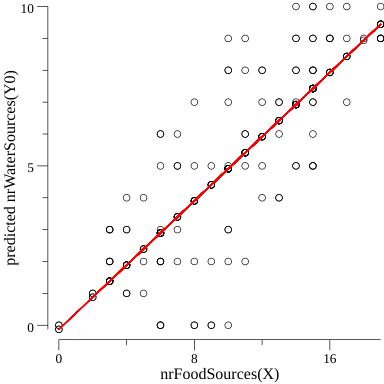

In [26]:
func main() {
    // define the column index for X and y
    nrFoodSourcesIndex := 3
    nrWaterSourcesIndex := 4

    //getting X and Y 
    X_data, y_data := getXAndYWithColumnIndex(nrFoodSourcesIndex, nrWaterSourcesIndex, df) 

    // Split the data
    test_x, test_y, train_x, train_y := train_test_split(X_data, y_data, 0.80)

    // Calculate coefficients
    b0, b1 := estimateB0B1(train_x, train_y)
    fmt.Printf("so our b0 and b1 will be b0=%v , b1=%v\n", b0, b1)

    // Test the model
    prediction := testing(test_x,test_y, b0, b1)

    rsquared := rSquared(test_y, prediction)
    fmt.Println("R-squared:", rsquared)

    // Create a new plot
    p, err := createPlot(test_x, test_y, prediction)
    
    if err != nil {
        fmt.Println("Error creating plot:", err)
        return
    }

    //displaying plot 
    displayPlot(p)
}

#### Implementing the Linear Regression Algorithm
First Function we will need is to split the data into training and testing sets. We will use this function to split the data into training and testing sets based on the given train_ratio.

In [18]:
func train_test_split(x_ []float64, y_ []float64, train_ratio float64) ([]float64, []float64, []float64, []float64) {
     if len(x_) != len(y_) {
      fmt.Printf("Size of X and Y are different :", len(x_), " and ", len(y_))
     }
     var length float64 = float64(len(x_))
     pos := int(length * train_ratio)
     var test_x = x_[pos-1:]
     var test_y = y_[pos-1:]
     var train_x = x_[:pos-1]
     var train_y = y_[:pos-1]
    return test_x, test_y, train_x, train_y
}

In [19]:
// resultXY --> sum((x-meanX)*(y-meanY))
// resultXX --> sum((x-meanX)^2)
func sumXYandXX(arrayX []float64, arrayY []float64, meanX float64, meanY float64) (float64, float64) {
 resultXX := 0.0
 resultXY := 0.0
for x := 0; x < len(arrayX); x++ {
  for y := 0; y < len(arrayY); y++ {
   if x == y {
    resultXY += (arrayX[x] - meanX) * (arrayY[y] - meanY)
   }
  }
  resultXX += (arrayX[x] - meanX) * (arrayX[x] - meanX)
 }
return resultXY, resultXX
}

This function calculates the regression coefficients b0 and b1 using the least squares method. The formula for calculating the slope b1 is given by:

In [20]:
// estimateBoB1 --> Function that calculates the regression coefficients b0 and b1
// y_predicted = b0 + b1*x_input
func estimateB0B1(x []float64, y []float64) (float64, float64) {
     var meanX float64
     var meanY float64
     var sumXY float64
     var sumXX float64
    meanX = stat.Mean(x, nil) //mean of x
     meanY = stat.Mean(y, nil) //mean pf y
    sumXY, sumXX = sumXYandXX(x, y, meanX, meanY)
    // regression coefficients
     b1 := sumXY / sumXX    // b1 or slope
     b0 := meanY - b1*meanX // b0 or intercept
     return b0, b1
}

This function calculates the R-squared value, which is a measure of how well the regression model fits the data. The formula for calculating the R-squared value is given by:

In [21]:
func rSquared(yActual []float64, yPredicted []float64) float64 {
    yMean := stat.Mean(yActual, nil)
    sumSqTotal := 0.0
    sumSqResidual := 0.0
    for i := range yActual {
        sumSqTotal += (yActual[i] - yMean) * (yActual[i] - yMean)
        sumSqResidual += (yActual[i] - yPredicted[i]) * (yActual[i] - yPredicted[i])
    }
    return 1.0 - (sumSqResidual / sumSqTotal)
}

This function tests the model by making predictions on the test data and printing the results.

In [22]:
func testing(x_test []float64, y_test []float64, b0 float64, b1 float64) []float64 {
 sz := len(x_test)
 res := make([]float64, sz)
 for i := 0; i < len(x_test); i++ {
  res[i] = b0 + b1*x_test[i]
 }

 // Convert []float64 to []interface{}
 x_test_interface := make([]interface{}, len(x_test))
 for i, v := range x_test {
  x_test_interface[i] = v
 }

 res_interface := make([]interface{}, len(res))
 for i, v := range res {
  res_interface[i] = v
 }

 y_test_interface := make([]interface{}, len(y_test))
 for i, v := range y_test {
  y_test_interface[i] = v
 }

 // Create three Series of type float64
 X_data := dataframe.NewSeriesFloat64("X", nil, x_test_interface...)
 Y_predicted := dataframe.NewSeriesFloat64("Y_predicted", nil, res_interface...)
 Y_actual := dataframe.NewSeriesFloat64("Y_actual", nil, y_test_interface...)

 // Create a DataFrame with the three Series
 df := dataframe.NewDataFrame(X_data, Y_predicted, Y_actual)

 // Print the DataFrame
 fmt.Print(df.Table())

 return res
}

This function gets the X and y values from the dataframe based on the column index.

In [23]:
func getXAndYWithColumnIndex(xColIndex int, yColIndex int, df *dataframe.DataFrame) ([]float64, []float64) {
    X_data := make([]float64, df.NRows())
    y_data := make([]float64, df.NRows())

    for i := 0; i < df.NRows(); i++ {
        X_val, ok := df.Series[xColIndex].Value(i).(float64)
        if !ok {
            // Handle the case when the value is not float64
            // Convert it to float64 or handle it appropriately
            X_val = float64(df.Series[xColIndex].Value(i).(int64))
        }
        X_data[i] = X_val

        y_val, ok := df.Series[yColIndex].Value(i).(float64)
        if !ok {
            // Handle the case when the value is not float64
            // Convert it to float64 or handle it appropriately
            y_val = float64(df.Series[yColIndex].Value(i).(int64))
        }
        y_data[i] = y_val
    }

    return X_data, y_data
}

This function displays the plot using the gonum/plot library.

In [24]:
func displayPlot(p *plot.Plot) {
    // Create a new image canvas
    c := vgimg.New(4*vg.Inch, 4*vg.Inch)

    // Draw the plot on the canvas
    p.Draw(draw.New(c))

    // Retrieve the image from the canvas
    img := c.Image()

    // Display the image
    gonbui.DisplayImage(img)
}

This function will create the plot using the gonum/plot library. It will add the actual and predicted values to the scatter plotter and the predicted values to the line plotter. It will then display the plot.

In [25]:
// Function to create and configure the plot
func createPlot(test_x []float64, test_y []float64, prediction []float64) (*plot.Plot, error) {
    // Create a new plot
    p, err := plot.New()
    if err != nil {
        return nil, err
    }

    // Create a scatter plotter
    s, err := plotter.NewScatter(plotter.XYs{})
    if err != nil {
        return nil, err
    }

    // Add the actual and predicted values to the scatter plotter
    for i := range test_x {
        s.XYs = append(s.XYs, plotter.XY{X: test_x[i], Y: test_y[i]})
        s.XYs = append(s.XYs, plotter.XY{X: test_x[i], Y: prediction[i]})
    }

    // Add the scatter plotter to the plot
    p.Add(s)

    // Name the x-axis and y-axis
    p.X.Label.Text = "nrFoodSources(X)"
    p.Y.Label.Text = "predicted nrWaterSources(Y0)"

    // Create a line plotter
    l, err := plotter.NewLine(plotter.XYs{})
    if err != nil {
        return nil, err
    }

    // Add the predicted values to the line plotter
    for i := range test_x {
        l.XYs = append(l.XYs, plotter.XY{X: test_x[i], Y: prediction[i]})
    }

    // Set the line color
    l.LineStyle.Color = color.RGBA{R: 255, G: 0, B: 0, A: 255} // Red color

    // Add the line plotter to the plot
    p.Add(l)

    return p, nil
}